In [83]:
%reset -f
import pandas as pd
import numpy as np
import datetime
import math
from scipy import stats

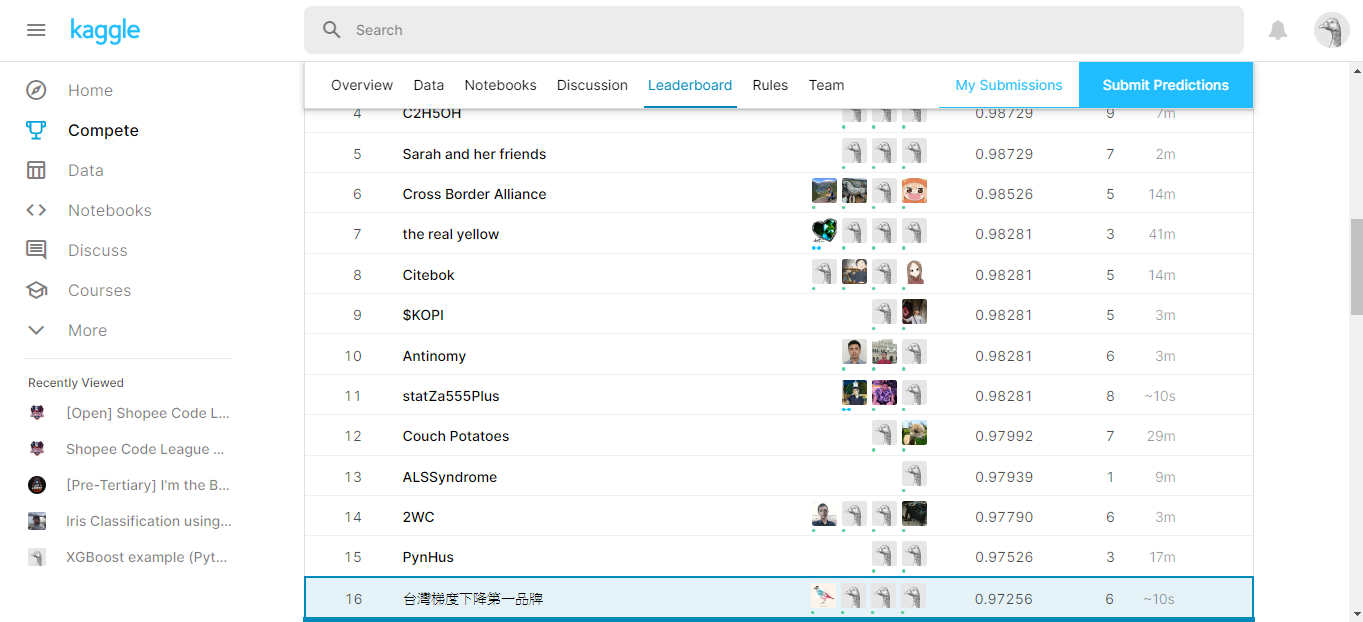

In [106]:
Image("SCL_1_Ranking.png")

In [84]:
import os 
path = 'xxxxxxxxxxx'
os.chdir(path)
os.listdir(path)

['Order Brushing.csv']

In [85]:
data = pd.read_csv(path+'Order Brushing.csv')
data.head(5)

,orderid,shopid,userid,event_time
0,31076582227611,93950878,30530270,2019/12/27 00:23
1,31118059853484,156423439,46057927,2019/12/27 11:54
2,31123355095755,173699291,67341739,2019/12/27 13:22
3,31122059872723,63674025,149380322,2019/12/27 13:01
4,31117075665123,127249066,149493217,2019/12/27 11:37


#### Sorting

In [86]:
data = data.sort_values(['shopid','orderid','event_time'])
data.head(10)

,orderid,shopid,userid,event_time
59,31086409141107,10009,196962305,2019/12/27 03:06
76187,31144571933461,10051,2854032,2019/12/27 19:16
9055,31254979546679,10051,48600461,2019/12/29 01:56
188513,31195675919209,10061,168750452,2019/12/28 09:27
174620,31205132327893,10061,194819216,2019/12/28 12:05
200439,31412115824794,10061,130633421,2019/12/30 21:35
145426,31431527100615,10061,62464559,2019/12/31 02:58
167859,31075686185309,10084,4401933,2019/12/27 00:08
178051,31077155357404,10084,13837190,2019/12/27 00:32
91837,31079024994425,10084,39828049,2019/12/27 01:03


In [171]:
import copy
data_cal = copy.deepcopy(data)

#### GroupBy Apply

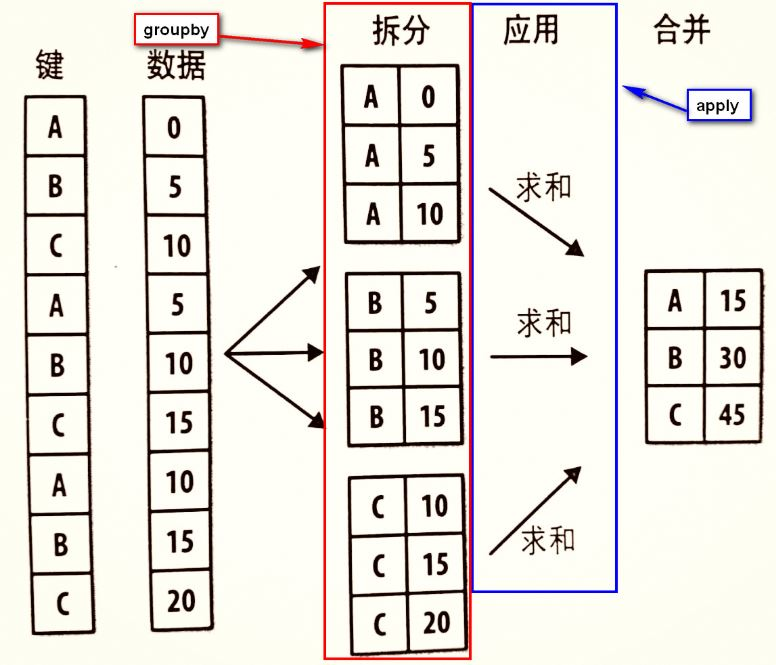

In [88]:
from IPython.display import Image
Image("apply.jpg")

## Key Point:
先找出會進行Order Brushing的買家,再從這些買家找出他買了哪些店家

#### 思路1:同樣的User在同一店家買的次數

In [172]:
#找出UserID在每家的消費次數
user_shop_cnt = data_cal.groupby(['userid','shopid']).size()
user_shop_cnt = user_shop_cnt.to_frame(name = 'user_shop_cnt').reset_index()
user_shop_cnt.head(10)

,userid,shopid,user_shop_cnt
0,10007,119391047,1
1,10020,11896733,1
2,10050,36453588,1
3,10050,43527981,1
4,10050,52280537,1
5,10050,65500189,1
6,10050,88202387,1
7,10057,61475131,1
8,10057,83699001,1
9,10057,147941492,1


(array([1.9268e+05, 9.4830e+03, 1.6870e+03, 6.0800e+02, 2.7200e+02,
        1.1300e+02, 5.7000e+01, 3.1000e+01, 2.7000e+01, 1.0000e+01,
        5.0000e+00, 4.0000e+00, 2.0000e+00, 2.0000e+00, 3.0000e+00,
        5.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00]),
 array([ 1.        ,  1.96774194,  2.93548387,  3.90322581,  4.87096774,
         5.83870968,  6.80645161,  7.77419355,  8.74193548,  9.70967742,
        10.67741935, 11.64516129, 12.61290323, 13.58064516, 14.5483871 ,
        15.51612903, 16.48387097, 17.4516129 , 18.41935484, 19.38709677,
        20.35483871, 21.32258065, 22.29032258, 23.25806452, 24.22580645,
        25.19354839, 26.16129032, 27.12903226, 28.09677419, 29.06451613,
        30.03225806, 31.        ]),
 <a list of 31 Patch objects>)

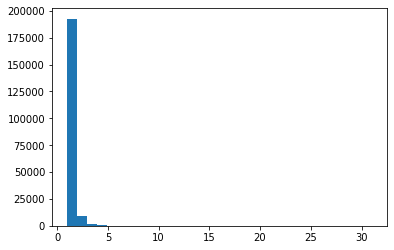

In [173]:
import matplotlib.pyplot as plt
plt.hist(user_shop_cnt['user_shop_cnt'],bins=31)

In [174]:
data_cal = data_cal.merge(user_shop_cnt,how='left',on = ['userid','shopid'])

In [175]:
data_cal['user_shop_cnt'].describe()

count    222750.000000
mean          1.278958
std           1.196106
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          31.000000
Name: user_shop_cnt, dtype: float64

In [176]:
data_cal = data_cal.sort_values(['user_shop_cnt','userid','shopid','event_time'],ascending=False)
data_cal.head(10)

#data_cal.dtypes

,orderid,shopid,userid,event_time,user_shop_cnt
176630,31422786340059,147941492,208806468,2019/12/31 00:33,31
176631,31422823250087,147941492,208806468,2019/12/31 00:33,31
176625,31422743588161,147941492,208806468,2019/12/31 00:32,31
176618,31422663800508,147941492,208806468,2019/12/31 00:31,31
176622,31422708561249,147941492,208806468,2019/12/31 00:31,31
175294,31381561756772,147941492,208806468,2019/12/30 13:06,31
175084,31379563700929,147941492,208806468,2019/12/30 12:32,31
174797,31373120986798,147941492,208806468,2019/12/30 10:45,31
173893,31335755952064,147941492,208806468,2019/12/30 00:22,31
173890,31335718083934,147941492,208806468,2019/12/30 00:21,31


#### 思路2:每一個買家在每家店買的消費比例

In [177]:
shopid_cnt = data_cal.groupby(['shopid']).size()
shopid_cnt = shopid_cnt.to_frame(name = 'shopid_cnt').reset_index()
shopid_cnt.head(10)

,shopid,shopid_cnt
0,10009,1
1,10051,2
2,10061,4
3,10084,55
4,10100,42
5,10107,1
6,10108,2
7,10110,2
8,10132,10
9,10133,12


In [178]:
data_cal = data_cal.merge(shopid_cnt,on = 'shopid',how = 'left')
data_cal['userid_shopid_ratio'] = data_cal['user_shop_cnt']/data_cal['shopid_cnt']

data_cal.head(10)

,orderid,shopid,userid,event_time,user_shop_cnt,shopid_cnt,userid_shopid_ratio
0,31422786340059,147941492,208806468,2019/12/31 00:33,31,11703,0.002649
1,31422823250087,147941492,208806468,2019/12/31 00:33,31,11703,0.002649
2,31422743588161,147941492,208806468,2019/12/31 00:32,31,11703,0.002649
3,31422663800508,147941492,208806468,2019/12/31 00:31,31,11703,0.002649
4,31422708561249,147941492,208806468,2019/12/31 00:31,31,11703,0.002649
5,31381561756772,147941492,208806468,2019/12/30 13:06,31,11703,0.002649
6,31379563700929,147941492,208806468,2019/12/30 12:32,31,11703,0.002649
7,31373120986798,147941492,208806468,2019/12/30 10:45,31,11703,0.002649
8,31335755952064,147941492,208806468,2019/12/30 00:22,31,11703,0.002649
9,31335718083934,147941492,208806468,2019/12/30 00:21,31,11703,0.002649


In [179]:
data_cal['userid_shopid_ratio'].describe()

count    222750.000000
mean          0.090687
std           0.199705
min           0.000085
25%           0.007246
50%           0.021277
75%           0.062500
max           1.000000
Name: userid_shopid_ratio, dtype: float64

(array([1.35971e+05, 3.20140e+04, 1.35630e+04, 8.51000e+03, 3.13800e+03,
        3.51400e+03, 3.61100e+03, 3.96400e+03, 2.57000e+02, 5.40000e+01,
        4.20200e+03, 6.20000e+01, 2.87000e+02, 5.90000e+01, 1.70000e+01,
        5.22700e+03, 0.00000e+00, 2.20000e+01, 3.90000e+01, 8.00000e+00,
        3.60000e+02, 0.00000e+00, 0.00000e+00, 6.30000e+01, 5.10000e+01,
        1.50000e+01, 2.20000e+01, 7.00000e+00, 0.00000e+00, 0.00000e+00,
        7.71300e+03]),
 array([8.54481757e-05, 3.23407563e-02, 6.45960644e-02, 9.68513725e-02,
        1.29106681e-01, 1.61361989e-01, 1.93617297e-01, 2.25872605e-01,
        2.58127913e-01, 2.90383221e-01, 3.22638529e-01, 3.54893838e-01,
        3.87149146e-01, 4.19404454e-01, 4.51659762e-01, 4.83915070e-01,
        5.16170378e-01, 5.48425686e-01, 5.80680994e-01, 6.12936303e-01,
        6.45191611e-01, 6.77446919e-01, 7.09702227e-01, 7.41957535e-01,
        7.74212843e-01, 8.06468151e-01, 8.38723459e-01, 8.70978768e-01,
        9.03234076e-01, 9.35489384e

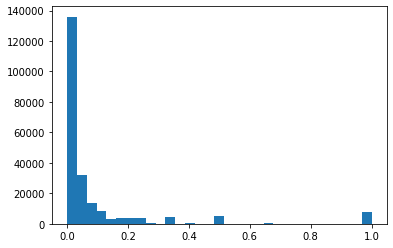

In [180]:
plt.hist(data_cal['userid_shopid_ratio'],bins=31)

#### 思路3:買家總消費數/賣家總交易數

In [181]:
user_cnt_3 = data_cal.groupby(['userid']).apply(lambda x :x.shape[0])
user_cnt_3 = user_cnt_3.to_frame(name = 'user_cnt_3').reset_index()

user_cnt_3.head(10)

,userid,user_cnt_3
0,10007,1
1,10020,1
2,10050,5
3,10057,3
4,10084,2
5,10119,4
6,10130,1
7,10147,1
8,10165,8
9,10180,2


In [182]:
shop_cnt_3 = data_cal.groupby(['shopid']).apply(lambda x :x.shape[0])
shop_cnt_3 = shop_cnt_3.to_frame(name = 'shop_cnt_3').reset_index()

shop_cnt_3.head(10)

,shopid,shop_cnt_3
0,10009,1
1,10051,2
2,10061,4
3,10084,55
4,10100,42
5,10107,1
6,10108,2
7,10110,2
8,10132,10
9,10133,12


In [183]:
data_cal = data_cal.merge(user_cnt_3,on = 'userid',how = 'left')
data_cal = data_cal.merge(shop_cnt_3,on = 'shopid',how = 'left')

data_cal.head(5)

,orderid,shopid,userid,event_time,user_shop_cnt,shopid_cnt,userid_shopid_ratio,user_cnt_3,shop_cnt_3
0,31422786340059,147941492,208806468,2019/12/31 00:33,31,11703,0.002649,32,11703
1,31422823250087,147941492,208806468,2019/12/31 00:33,31,11703,0.002649,32,11703
2,31422743588161,147941492,208806468,2019/12/31 00:32,31,11703,0.002649,32,11703
3,31422663800508,147941492,208806468,2019/12/31 00:31,31,11703,0.002649,32,11703
4,31422708561249,147941492,208806468,2019/12/31 00:31,31,11703,0.002649,32,11703


In [184]:
data_cal['feat_3'] =data_cal['user_cnt_3'] /data_cal['shop_cnt_3']  
data_cal['feat_3'].head(3)

0    0.002734
1    0.002734
2    0.002734
Name: feat_3, dtype: float64

## 時間差
在同一個賣家中，某一買家連買多筆

In [185]:
data_cal = data_cal.sort_values(['shopid','event_time','userid'])

In [186]:
#同一個Shopid中的
data_cal['previous_userid'] = data_cal.groupby(['shopid'])['userid'].shift(1)
data_cal.head(10)

,orderid,shopid,userid,event_time,user_shop_cnt,shopid_cnt,userid_shopid_ratio,user_cnt_3,shop_cnt_3,feat_3,previous_userid
50098,31086409141107,10009,196962305,2019/12/27 03:06,1,1,1.000000,4,1,4.000000,NaN
211625,31144571933461,10051,2854032,2019/12/27 19:16,1,2,0.500000,1,2,0.500000,NaN
162848,31254979546679,10051,48600461,2019/12/29 01:56,1,2,0.500000,1,2,0.500000,2854032.0
70771,31195675919209,10061,168750452,2019/12/28 09:27,1,4,0.250000,1,4,0.250000,NaN
51696,31205132327893,10061,194819216,2019/12/28 12:05,1,4,0.250000,2,4,0.500000,168750452.0
95389,31412115824794,10061,130633421,2019/12/30 21:35,1,4,0.250000,1,4,0.250000,194819216.0
151589,31431527100615,10061,62464559,2019/12/31 02:58,1,4,0.250000,7,4,1.750000,130633421.0
208268,31075686185309,10084,4401933,2019/12/27 00:08,1,55,0.018182,2,55,0.036364,NaN
195617,31077155357404,10084,13837190,2019/12/27 00:32,1,55,0.018182,11,55,0.200000,4401933.0
170777,31079024994425,10084,39828049,2019/12/27 01:03,1,55,0.018182,6,55,0.109091,13837190.0


In [187]:
data_cal['userid_bool'] = np.where(data_cal['previous_userid'] == data_cal['userid'],1,0)
data_cal['userid_bool'] = data_cal['userid_bool'].fillna(0)

In [192]:
#demonstrate how to use userid_bool_lag2
'''
shopid|userid|userid_bool|userid_bool_lag2|
A     |  1   |   Na      |  NA            |
A     |  1   |   1       |  NA            |
A     |  1   |   1       |   1            |
'''

data_cal['userid_bool_lag2'] = data_cal.groupby(['shopid'])['userid_bool'].shift(1)
data_cal['userid_1=2'] = data_cal['userid_bool_lag2'] + data_cal['userid_bool']

data_cal.head(10)

,orderid,shopid,userid,event_time,user_shop_cnt,shopid_cnt,userid_shopid_ratio,user_cnt_3,shop_cnt_3,feat_3,previous_userid,userid_bool,userid_bool_lag2,userid_1=2
50098,31086409141107,10009,196962305,2019/12/27 03:06,1,1,1.000000,4,1,4.000000,NaN,0,NaN,NaN
211625,31144571933461,10051,2854032,2019/12/27 19:16,1,2,0.500000,1,2,0.500000,NaN,0,NaN,NaN
162848,31254979546679,10051,48600461,2019/12/29 01:56,1,2,0.500000,1,2,0.500000,2854032.0,0,0.0,0.0
70771,31195675919209,10061,168750452,2019/12/28 09:27,1,4,0.250000,1,4,0.250000,NaN,0,NaN,NaN
51696,31205132327893,10061,194819216,2019/12/28 12:05,1,4,0.250000,2,4,0.500000,168750452.0,0,0.0,0.0
95389,31412115824794,10061,130633421,2019/12/30 21:35,1,4,0.250000,1,4,0.250000,194819216.0,0,0.0,0.0
151589,31431527100615,10061,62464559,2019/12/31 02:58,1,4,0.250000,7,4,1.750000,130633421.0,0,0.0,0.0
208268,31075686185309,10084,4401933,2019/12/27 00:08,1,55,0.018182,2,55,0.036364,NaN,0,NaN,NaN
195617,31077155357404,10084,13837190,2019/12/27 00:32,1,55,0.018182,11,55,0.200000,4401933.0,0,0.0,0.0
170777,31079024994425,10084,39828049,2019/12/27 01:03,1,55,0.018182,6,55,0.109091,13837190.0,0,0.0,0.0


In [194]:
sum(data_cal['userid_1=2']==2) #719筆連續三筆

719

In [202]:
data_cal['event_time'] = pd.to_datetime(data_cal['event_time'], format='%Y-%m-%d %H:%M:%S')

# 計算時間差
data_cal['previous_time'] = data_cal.groupby(['shopid'])['event_time'].shift(1)
data_cal['time_diff'] = data_cal['event_time'] - data_cal['previous_time']

In [203]:
data_cal['time_diff'] = data_cal['time_diff'].astype('timedelta64[m]')
data_cal.head(10)

,orderid,shopid,userid,event_time,user_shop_cnt,shopid_cnt,userid_shopid_ratio,user_cnt_3,shop_cnt_3,feat_3,previous_userid,userid_bool,userid_bool_lag2,userid_1=2,previous_time,time_diff
50098,31086409141107,10009,196962305,2019-12-27 03:06:00,1,1,1.000000,4,1,4.000000,NaN,0,NaN,NaN,NaT,NaN
211625,31144571933461,10051,2854032,2019-12-27 19:16:00,1,2,0.500000,1,2,0.500000,NaN,0,NaN,NaN,NaT,NaN
162848,31254979546679,10051,48600461,2019-12-29 01:56:00,1,2,0.500000,1,2,0.500000,2854032.0,0,0.0,0.0,2019-12-27 19:16:00,1840.0
70771,31195675919209,10061,168750452,2019-12-28 09:27:00,1,4,0.250000,1,4,0.250000,NaN,0,NaN,NaN,NaT,NaN
51696,31205132327893,10061,194819216,2019-12-28 12:05:00,1,4,0.250000,2,4,0.500000,168750452.0,0,0.0,0.0,2019-12-28 09:27:00,158.0
95389,31412115824794,10061,130633421,2019-12-30 21:35:00,1,4,0.250000,1,4,0.250000,194819216.0,0,0.0,0.0,2019-12-28 12:05:00,3450.0
151589,31431527100615,10061,62464559,2019-12-31 02:58:00,1,4,0.250000,7,4,1.750000,130633421.0,0,0.0,0.0,2019-12-30 21:35:00,323.0
208268,31075686185309,10084,4401933,2019-12-27 00:08:00,1,55,0.018182,2,55,0.036364,NaN,0,NaN,NaN,NaT,NaN
195617,31077155357404,10084,13837190,2019-12-27 00:32:00,1,55,0.018182,11,55,0.200000,4401933.0,0,0.0,0.0,2019-12-27 00:08:00,24.0
170777,31079024994425,10084,39828049,2019-12-27 01:03:00,1,55,0.018182,6,55,0.109091,13837190.0,0,0.0,0.0,2019-12-27 00:32:00,31.0


In [204]:
# 計算兩期平均時間差
data_cal['time_diff_SMA2'] = data_cal.groupby(['shopid'])['time_diff'].transform(lambda x: x.rolling(2).mean())

## 抓出有連續刷三筆的userid

In [210]:
userid_con3 = pd.DataFrame(data_cal[data_cal['userid_1=2']==2]['userid'].unique())
userid_con3.columns=['userid']

In [211]:
userid_con3['cont3_flag'] = 1
userid_con3

,userid,cont3_flag
0,214988798,1
1,77819,1
2,672345,1
3,32449911,1
4,740844,1
...,...,...
463,95555289,1
464,198662175,1
465,214111334,1
466,52867898,1


In [212]:
data_cal = data_cal.merge(userid_con3,on = 'userid',how='left') 

In [216]:
data_cal.shape

(222750, 18)

In [241]:
#同一店家連續刷超過三筆
sub_df = data_cal[data_cal['userid_1=2']==2] 

In [242]:
sub_df.shape

(719, 18)

In [243]:
#時間差不超過30分鐘
sub_df = sub_df[sub_df['time_diff_SMA2']<30]
sub_df.shape

(571, 18)

In [244]:
sub_df

,orderid,shopid,userid,event_time,user_shop_cnt,shopid_cnt,userid_shopid_ratio,user_cnt_3,shop_cnt_3,feat_3,previous_userid,userid_bool,userid_bool_lag2,userid_1=2,previous_time,time_diff,time_diff_SMA2,cont3_flag
396,31323403482068,10159,214988798,2019-12-29 20:56:00,3,99,0.030303,3,99,0.030303,214988798.0,1,1.0,2.0,2019-12-29 20:40:00,16.0,9.0,1.0
1175,31213825677675,10402,77819,2019-12-28 14:30:00,3,13,0.230769,8,13,0.615385,77819.0,1,1.0,2.0,2019-12-28 14:29:00,1.0,3.0,1.0
1358,31117448503731,10536,672345,2019-12-27 11:44:00,8,13,0.615385,8,13,0.615385,672345.0,1,1.0,2.0,2019-12-27 11:33:00,11.0,12.5,1.0
1361,31139726362042,10536,672345,2019-12-27 17:55:00,8,13,0.615385,8,13,0.615385,672345.0,1,1.0,2.0,2019-12-27 17:46:00,9.0,13.0,1.0
2072,31156718095710,42472,740844,2019-12-27 22:38:00,3,16,0.187500,9,16,0.562500,740844.0,1,1.0,2.0,2019-12-27 22:33:00,5.0,5.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221164,31421977784702,204225676,198662175,2019-12-31 00:19:00,5,14,0.357143,9,14,0.642857,198662175.0,1,1.0,2.0,2019-12-31 00:16:00,3.0,2.0,1.0
221716,31398125876682,208696908,214111334,2019-12-30 17:42:00,4,5,0.800000,4,5,0.800000,214111334.0,1,1.0,2.0,2019-12-30 17:38:00,4.0,4.5,1.0
222358,31103334671961,210197928,52867898,2019-12-27 07:48:00,4,4,1.000000,4,4,1.000000,52867898.0,1,1.0,2.0,2019-12-27 07:48:00,0.0,0.5,1.0
222359,31103396827994,210197928,52867898,2019-12-27 07:49:00,4,4,1.000000,4,4,1.000000,52867898.0,1,1.0,2.0,2019-12-27 07:48:00,1.0,0.5,1.0


In [245]:
#****#
sub_df[['shopid', 'userid']] = sub_df[['shopid', 'userid']].astype(str)

## Submit

In [246]:
#先把grouping的id存成list
sub_df = sub_df.groupby(['shopid'])['userid'].apply(lambda x: x.unique())

In [247]:
sub_df

shopid
100446829      [2434757]
10159        [214988798]
10199219       [8405753]
10206302      [95058664]
103715156    [214226569]
                ...     
98768262     [150440717]
98793086     [142710562]
99067259     [108402614]
99833363     [199696834]
99836251     [197470611]
Name: userid, Length: 348, dtype: object

In [248]:
sub_df = sub_df.apply(lambda x: '&'.join(x.tolist()))

In [251]:
sub_df.head(20)

shopid
100446829               2434757
10159                 214988798
10199219                8405753
10206302               95058664
103715156             214226569
10402                     77819
104245736             188187242
104278513              80682958
104457555             214778616
104590058              81928284
104590579             213714377
104955370              10051694
10498480              199416406
105064701             214431654
10536                    672345
106051591               1276208
106390103              51759862
107153763               9753706
107189025    159315857&35639374
108064389             212200633
Name: userid, dtype: object